In [45]:
import pandas as pd

In [46]:
data=pd.read_csv("SolarPrediction.csv")
data

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 0:00,23:55:26,1.21,48,30.46,59,177.39,5.62,6:13:00,18:13:00
1,1475229023,9/29/2016 0:00,23:50:23,1.21,48,30.46,58,176.78,3.37,6:13:00,18:13:00
2,1475228726,9/29/2016 0:00,23:45:26,1.23,48,30.46,57,158.75,3.37,6:13:00,18:13:00
3,1475228421,9/29/2016 0:00,23:40:21,1.21,48,30.46,60,137.71,3.37,6:13:00,18:13:00
4,1475228124,9/29/2016 0:00,23:35:24,1.17,48,30.46,62,104.95,5.62,6:13:00,18:13:00
...,...,...,...,...,...,...,...,...,...,...,...
32681,1480587604,12/1/2016 0:00,0:20:04,1.22,44,30.43,102,145.42,6.75,6:41:00,17:42:00
32682,1480587301,12/1/2016 0:00,0:15:01,1.17,44,30.42,102,117.78,6.75,6:41:00,17:42:00
32683,1480587001,12/1/2016 0:00,0:10:01,1.20,44,30.42,102,145.19,9.00,6:41:00,17:42:00
32684,1480586702,12/1/2016 0:00,0:05:02,1.23,44,30.42,101,164.19,7.87,6:41:00,17:42:00


<AxesSubplot:xlabel='Radiation', ylabel='Humidity'>

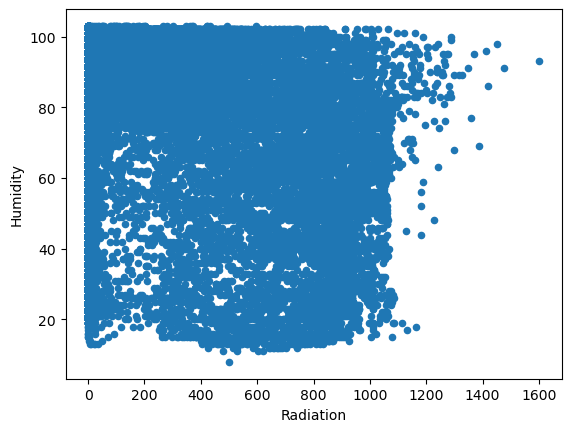

In [47]:
#A1
data.plot.scatter(x='Radiation',y='Humidity')

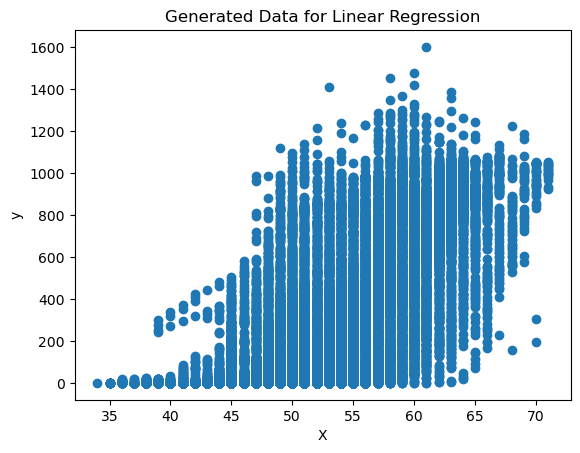

ValueError: With n_samples=1, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [48]:
#A2
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X = data['Temperature'].values.reshape(1,-1)                        
y = data['Radiation'].values.reshape(1,-1)

plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Generated Data for Linear Regression")
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X, y)

print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')

predicted_y = model.predict(y_test)
print(f'Predicted y for X=1.5: {predicted_y}')


In [ ]:
data['Radiation_Class']=  pd.cut(data['Radiation'], 
                                 bins=[0, 800,  1610], labels=[0, 1])

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
 
data['Radiation_Class'] = data['Radiation_Class'].astype(int)  

X= data.iloc[:,4:9]
y=data['Radiation_Class'].iloc[:]

scaler = StandardScaler()
X = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)


y_pred = log_reg.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the logistic regression model: {accuracy}")


print(f"Coefficients: {log_reg.coef_}")
print(f"Intercept: {log_reg.intercept_}")


In [53]:
#A5
from sklearn.tree import DecisionTreeRegressor


X = data['Temperature'].values.reshape(1,-1)                        
y = data['Radiation'].values.reshape(1,-1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg_tree = DecisionTreeRegressor()
reg_tree.fit(X, y)

new_X = np.array([12.5]) 

predicted_y_tree = reg_tree.predict(X)
print(f'Predicted y for X={X} (Regression Tree): {predicted_y_tree[0]}')


ValueError: With n_samples=1, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [49]:
from sklearn.neighbors import KNeighborsRegressor

knn_regressor = KNeighborsRegressor(n_neighbors=5)   
knn_regressor.fit(X, y)

predicted_y_knn = knn_regressor.predict(new_X)
print(f'Predicted y for X={new_X[0][0]} (k-NN Regressor): {predicted_y_knn[0][0]}')


ValueError: X has 1 features, but KNeighborsRegressor is expecting 32686 features as input.